# Snow and Stocks

In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn import linear_model
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.cluster import MeanShift, estimate_bandwidth
%matplotlib inline

In [2]:
# Use pandas read_csv command to import the local csv file
df = pd.read_csv('snow_and_rain.csv', skiprows=11, sep=';')
df.head()

,Year,Month,Day,Hour,Minute,Total Precipitation (high resolution) daily sum [sfc],Snowfall Amount (high resolution) daily sum [sfc]
0,2009,7,31,0,0,22.7,0.0
1,2009,8,1,0,0,17.4,0.0
2,2009,8,2,0,0,0.0,0.0
3,2009,8,3,0,0,0.2,0.0
4,2009,8,4,0,0,0.0,0.0


In [3]:
print(df.columns)

Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Total Precipitation (high resolution) daily sum [sfc]',
       'Snowfall Amount (high resolution) daily sum [sfc]'],
      dtype='object')


In [4]:
# drop the Hour and Minute columns
df.drop(['Hour', 'Minute'], axis=1, inplace=True)

df.columns = ['Year', 'Month', 'Day', 'Rain', 'Snow']

In [5]:
df.head()

,Year,Month,Day,Rain,Snow
0,2009,7,31,22.7,0.0
1,2009,8,1,17.4,0.0
2,2009,8,2,0.0,0.0
3,2009,8,3,0.2,0.0
4,2009,8,4,0.0,0.0


In [6]:
df_plot = df
df_plot['dt'] = pd.to_datetime((df.Year*10000+df.Month*100+df.Day).apply(str),format='%Y%m%d')
df_plot.columns = ['Year', 'Month', 'Day', 'Rain', 'Snow', 'dt']
df_plot.index = pd.to_datetime(df_plot.dt)
df_plot.drop(['Year'], axis=1, inplace=True)
df_plot.drop(['Month'], axis=1, inplace=True)
df_plot.drop(['Day'], axis=1, inplace=True)
df_plot.drop(['dt'], axis=1, inplace=True)

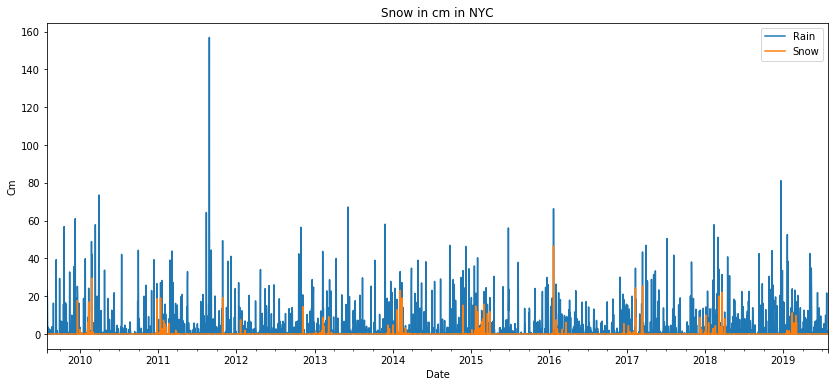

In [7]:
df_plot.plot(figsize=(14, 6))
plt.title('Snow in cm in NYC')
plt.xlabel('Date')
plt.ylabel('Cm')
plt.show()

In [8]:
# read in all of the local csv files into pandas:
df5 = pd.read_csv('SP500_new.csv')

# Convert price to a number, with coersion to throw NA's if conversion not possible
df5['price'] = pd.to_numeric(df5.SP500, errors='coerce')

# Remove NA's
df5.dropna(inplace=True)


In [9]:
df5.head()

,DATE,SP500,price
0,2009-08-07,1010.48,1010.48
1,2009-08-10,1007.10,1007.10
2,2009-08-11,994.35,994.35
3,2009-08-12,1005.81,1005.81
4,2009-08-13,1012.73,1012.73


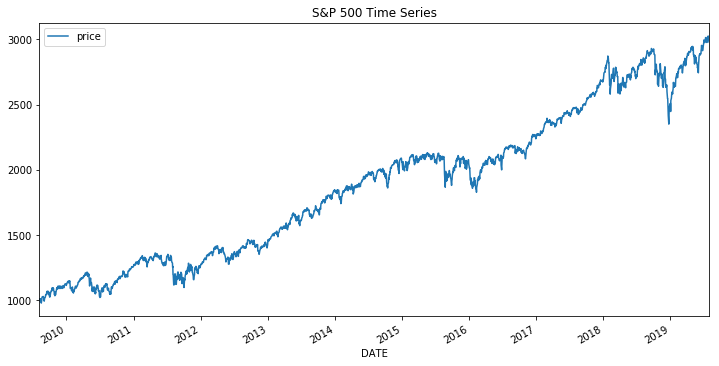

In [10]:
df5.index = pd.to_datetime(df5.DATE)
df5.plot(figsize=(12, 6))
plt.title('S&P 500 Time Series')
plt.show()

In [11]:
# For S&P 500
df5['date_time'] = pd.to_datetime(df5['DATE'])

df5['weekday'] = df5.date_time.dt.weekday
df5['day'] = df5.date_time.dt.day
df5['month'] = df5.date_time.dt.month
df5['year'] = df5.date_time.dt.year

In [12]:
# add a column for the change in price each day
df5['change'] = df5.price - df5.price.shift()

In [13]:
# For S&P 500
print(df5.loc[df5['weekday'] == 0, 'change'].sum())
print(df5.loc[df5['weekday'] == 1, 'change'].sum())
print(df5.loc[df5['weekday'] == 2, 'change'].sum())
print(df5.loc[df5['weekday'] == 3, 'change'].sum())
print(df5.loc[df5['weekday'] == 4, 'change'].sum())

52.15999999999292
673.5500000000052
574.7199999999998
320.70999999999515
348.76000000000704


In [14]:
print(ttest_ind(df5.change.where(df5.weekday == 0).dropna(), df5.change.where(df5.weekday == 1).dropna()))

Ttest_indResult(statistic=-1.1291802920678604, pvalue=0.2590969855069577)


In [15]:
df5.head()

,DATE,SP500,price,date_time,weekday,day,month,year,change
DATE,,,,,,,,,
2009-08-07,2009-08-07,1010.48,1010.48,2009-08-07,4,7,8,2009,NaN
2009-08-10,2009-08-10,1007.10,1007.10,2009-08-10,0,10,8,2009,-3.38
2009-08-11,2009-08-11,994.35,994.35,2009-08-11,1,11,8,2009,-12.75
2009-08-12,2009-08-12,1005.81,1005.81,2009-08-12,2,12,8,2009,11.46
2009-08-13,2009-08-13,1012.73,1012.73,2009-08-13,3,13,8,2009,6.92


C:\Users\Fred\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


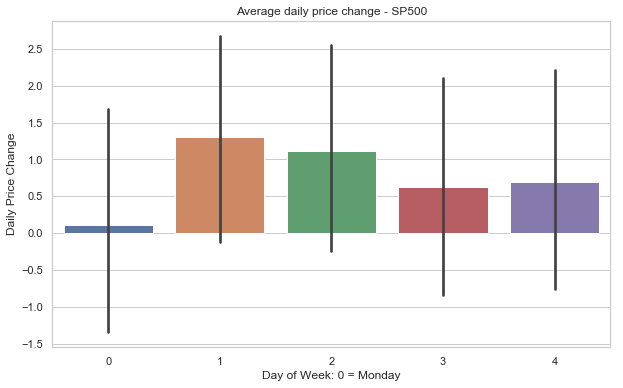

In [16]:
sns.set(style="whitegrid", rc={'figure.figsize':(10, 6)})
sns.barplot(x='weekday', y='change', ci=95, data=df5)
plt.xlabel('Day of Week: 0 = Monday')
plt.ylabel('Daily Price Change')
plt.title('Average daily price change - SP500')
plt.show()

In [17]:
df.drop(['Rain'], axis=1, inplace=True)
df.head()

,Snow
dt,
2009-07-31,0.0
2009-08-01,0.0
2009-08-02,0.0
2009-08-03,0.0
2009-08-04,0.0


In [18]:
# reset the index of this dataframe in order to merge this data with another dataframe
df.reset_index(level=0, inplace=True)

In [19]:
# print columns and reset index for S&P 500 data
print(df5.columns)

# Fill Nan values with 0
df5['change'].fillna(0, inplace=True)

# drop unnecessary columns 
df5.drop(['DATE'], axis=1, inplace=True)
df5.drop(['SP500'], axis=1, inplace=True)
df5.drop(['price'], axis=1, inplace=True)
df5.drop(['date_time'], axis=1, inplace=True)
df5.drop(['year'], axis=1, inplace=True)

# reset index for merging data with weather data
df5.reset_index(level=0, inplace=True)

Index(['DATE', 'SP500', 'price', 'date_time', 'weekday', 'day', 'month',
       'year', 'change'],
      dtype='object')


In [20]:
df5.head()

,DATE,weekday,day,month,change
0,2009-08-07,4,7,8,0.00
1,2009-08-10,0,10,8,-3.38
2,2009-08-11,1,11,8,-12.75
3,2009-08-12,2,12,8,11.46
4,2009-08-13,3,13,8,6.92


In [21]:
# create dataframe for S&P 500 and Snow in NYC in minutes
df_snow = (df.merge(df5, left_on='dt', right_on='DATE')
          .reindex(columns=['DATE', 'weekday', 'day', 'month', 'change', 'Snow']))

In [22]:
df_snow.head()

,DATE,weekday,day,month,change,Snow
0,2009-08-07,4,7,8,0.00,0.0
1,2009-08-10,0,10,8,-3.38,0.0
2,2009-08-11,1,11,8,-12.75,0.0
3,2009-08-12,2,12,8,11.46,0.0
4,2009-08-13,3,13,8,6.92,0.0


In [23]:
# average snowfall in centimeters:
print(df_snow.Snow.mean())

0.23134554140127384


In [24]:
print(ttest_ind(df_snow.Snow.where(df_snow.Snow == 0).dropna(), df_snow.change.where(df_snow.Snow > 0.1).dropna()))

Ttest_indResult(statistic=2.9011983106015315, pvalue=0.0037499083836441288)


In [25]:
# For S&P 500
print(df_snow.loc[df_snow['Snow'] == 0, 'change'].sum())
print(df_snow.loc[df_snow['Snow'] > 0.1, 'change'].sum())


1927.120000000002
-131.58000000000084


Wow, when it does not snow, the S&P 500 gained 1927 points over the past 10 years.  When it snowed at least 0.1 cm, it lost about 132 points.  Seems like snow is not good for stocks, but is this really true ?  See below for further investigation.

In [26]:
print(df_snow.loc[df_snow['Snow'] == 0, 'change'].count())
print(df_snow.loc[df_snow['Snow'] > 0.1, 'change'].count())

2374
125


As shown in the above cell, only 125 data points for when it snows at least 0.1 cm.

#### Look at some graphs to back up pvalue of 0.004 for no snow vs. snows at least 0.1 cm:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


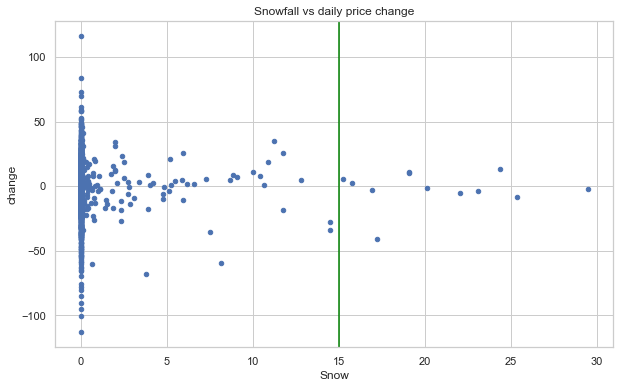

In [27]:
df_snow.plot(kind='scatter', x='Snow', y='change', title='Snowfall vs daily price change', 
                 figsize=(10, 6), grid=True)
plt.axvline(x=15, color='green')

From the graph above, it does look like when it snows, stocks perform worse.  The only problem is -- there are not very many data points for when it does snow.

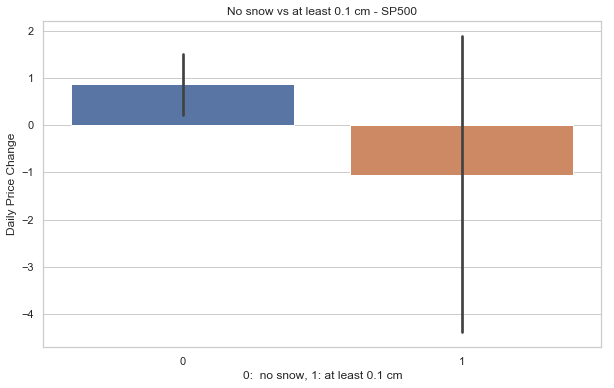

In [28]:
df_snow['amount'] = df_snow['Snow'].apply(lambda x: 1 if x > 0.1 else 0)


sns.set(style="whitegrid", rc={'figure.figsize':(10, 6)})
sns.barplot(x='amount', y='change', ci=95, data=df_snow)
plt.xlabel('0:  no snow, 1: at least 0.1 cm')
plt.ylabel('Daily Price Change')
plt.title('No snow vs at least 0.1 cm - SP500')
plt.show()

#### Conclusion:  Even though there is a low enough pvalue; there are not enough samples as evidenced by the mean barplot above with 95% confidence.  There is just too much variance in the possible mean values for when it snows at least 0.1 cm.  The number of days where this occurs from the past 10 years is 125 which was calculated a few cells above.  

#### The verticle black line above represents the range of the mean value for each dataset with 95% confidence.  There is way too much overlap in the possible mean values for each of the two distributions.  No real conclusion can be drawn for when it doesn't snow at all in NYC vs when it snows at least 0.1 cm.